# Bank Churn prediction project

## We are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. For more details on the dataset, please see source at https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data).

In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
#ensures that all plots generated by matplotlib are displayed inline (directly within the notebook) rather than opening in a separate window.
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from IPython.display import Image
from sklearn import tree
from os import system
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [4]:
data =pd.read_csv("credit (1).csv")

In [5]:
data.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


* there is missing values and some categorical values so we need to clean_up these data and converting them into numerical values.

In [7]:
data.shape

(1000, 17)

* There is 1000 rows and 17 columns in our data set.

In [9]:
data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


* In the desciribe method it will only give summery about numerical data.
* The month loan duration is 20.9 on average and the amount is 3271.25 on average aloso.
* The age of customers is 35.5 years.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [12]:
obj = 0
int64 = 0

for i in data.columns:
    if data[i].dtype == 'object':  # Use == to check for object dtype
        obj += 1
    elif data[i].dtype == 'int64':  # Check for int64 dtype
        int64 += 1

print("Number of object columns:", obj)
print("Number of int64 columns:", int64)
        

Number of object columns: 10
Number of int64 columns: 7


* There are 10 object (Non_numerical) columns and 10 numerical columns.


In [14]:
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=pd.Categorical(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

* I have converted object data into categorical dataframe for performance and memory  optimization.

In [16]:
for i in data.columns:
    if data[i].dtype == 'category':  # Check if the column is of type 'category'
        print(f"Column: {i}")
        print(data[i].value_counts())  # Print the count of unique values in the category column
        print("\n")

Column: checking_balance
checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64


Column: credit_history
credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64


Column: purpose
purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64


Column: savings_balance
savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64


Column: employment_duration
employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64


Column: other_credit
other_credit
none     814
bank     139
store     47
Name: count, dtype: int64


Column: housing
housing
own      713
rent 

In [17]:
replacement={"checking_balance":{"< 0 DM":1,"1 - 200 DM":2,"> 200 DM":3,"unknown":-1},
             "credit_history":{"critical":1,"poor":2,"good":3,"very good":4,"perfect":5},
             "savings_balance":{"< 100 DM":1,"100 - 500 DM":2,"500 - 1000 DM":3,"> 1000 DM":4,"unknown":-1},
             "employment_duration":{"unemployed":1,"< 1 year":2,"1 - 4 years":3,"4 - 7 years":4,"> 7 years":5},
             "phone":{"no":1,"yes":2},
             "default":{"no":0,"yes":1}}
data = data.replace(replacement)

onehotcols=["purpose","housing","other_credit","job"]
data = pd.get_dummies(data, columns=onehotcols)
data = data.astype(int)


/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_39168/1144095667.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(replacement)
/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_39168/1144095667.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data = data.replace(replacement)
/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_39168/1144095667.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

In [18]:
data.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,1,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,2,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,2,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,2,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [19]:
data['default'].value_counts()

default
0    700
1    300
Name: count, dtype: int64

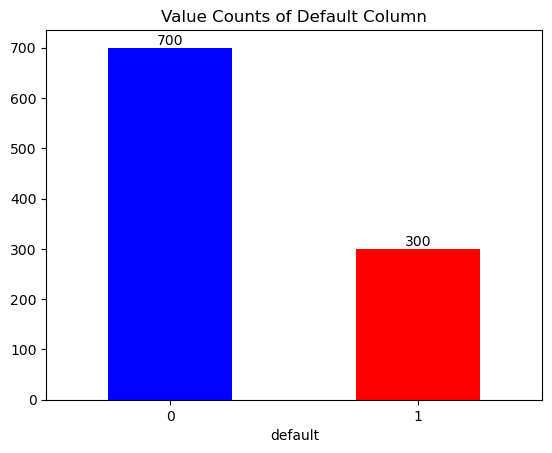

In [20]:
# Plot value counts
ax=data['default'].value_counts().plot(kind='bar', color=['blue', 'red'], title="Value Counts of Default Column")

plt.xticks(rotation=360)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
# Display the plot
plt.show()

* From the bar plot above, we can see that 700 customers did not churn, while 300 customers did.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

* After converting all categorical data into numeric values we are ready to process the data.

# Split data

In [25]:
X=data.drop('default',axis=1)
y=data['default']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [27]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((700, 28), (700,), (300, 28), (300,))

# Build Decision tree model

we will build our model using decsion tree and gini impurity.


In [30]:
decision_tree = DecisionTreeClassifier(criterion="gini", random_state=1)

# Train the model with your training data
DT=decision_tree.fit(X_train, y_train)

In [31]:
DT

DecisionTreeClassifier(random_state=1)

# DecisionTree Score

In [33]:
# Here i will calculate the accuracy for the training data and test data.
print("Accuracy on train data",decision_tree.score(X_train,y_train))
print("Accuracy on test data",decision_tree.score(X_test,y_test))


Accuracy on train data 1.0
Accuracy on test data 0.6933333333333334


In [34]:
#Here i will calculate the confusion matrix for the test data.
from sklearn.metrics import confusion_matrix

# Predict on training data
y_test_pred = decision_tree.predict(X_test)

# Generate confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix
print("Confusion Matrix for Training Data:")
print(cm_test)

Confusion Matrix for Training Data:
[[168  46]
 [ 46  40]]


In [35]:
#This is the default confusion matrix order from Sklearn library.
print("TN",cm_test[0][0])
print("FP",cm_test[0][1])
print("FN",cm_test[1][0])
print("TP",cm_test[1][1])

TN 168
FP 46
FN 46
TP 40


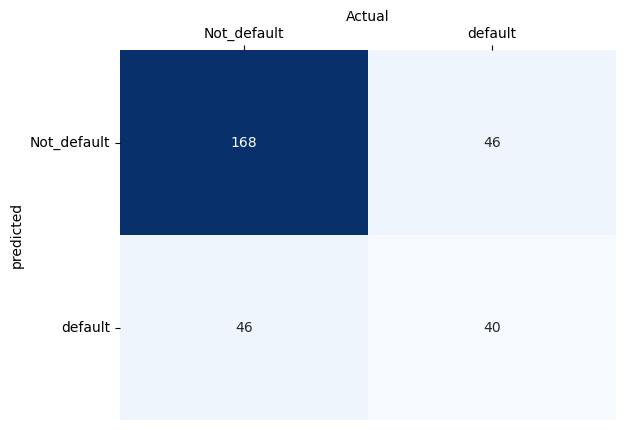

In [36]:
#This is a plot for the test data confusion matrix.
def conf_mat(model,y_test,X_test):
    y_pred=model.predict(X_test)
    confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
    sns.heatmap(confusion_matrix,cmap='Blues',cbar=False,annot=True,fmt='g')
    plt.xticks(np.arange(2)+0.5,['Not_default','default'])
    plt.yticks(np.arange(2)+0.5,['Not_default','default'],rotation=0)
    plt.gca().xaxis.set_label_position('top')
    plt.gca().xaxis.tick_top()
    plt.xlabel("Actual")
    plt.ylabel("predicted")
    plt.show()
conf_mat(decision_tree,y_test,X_test)

In [37]:
# why recall is important here?
#Since our goal is to prevent loan defaults, we should prioritize recall over accuracy as the evaluation metric. 
#as a high recall ensures that most defaulters are correctly identified.reducing the risk of granting loans to high-risk customers.
# To calculate recall for the test data:
print("Recall for the model_1 testing data =",(cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])))

Recall for the model_1 testing data = 0.46511627906976744


### Let's visualize the model_1 tree.

feature_names are ['checking_balance', 'months_loan_duration', 'credit_history', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'phone', 'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'housing_other', 'housing_own', 'housing_rent', 'other_credit_bank', 'other_credit_none', 'other_credit_store', 'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled']


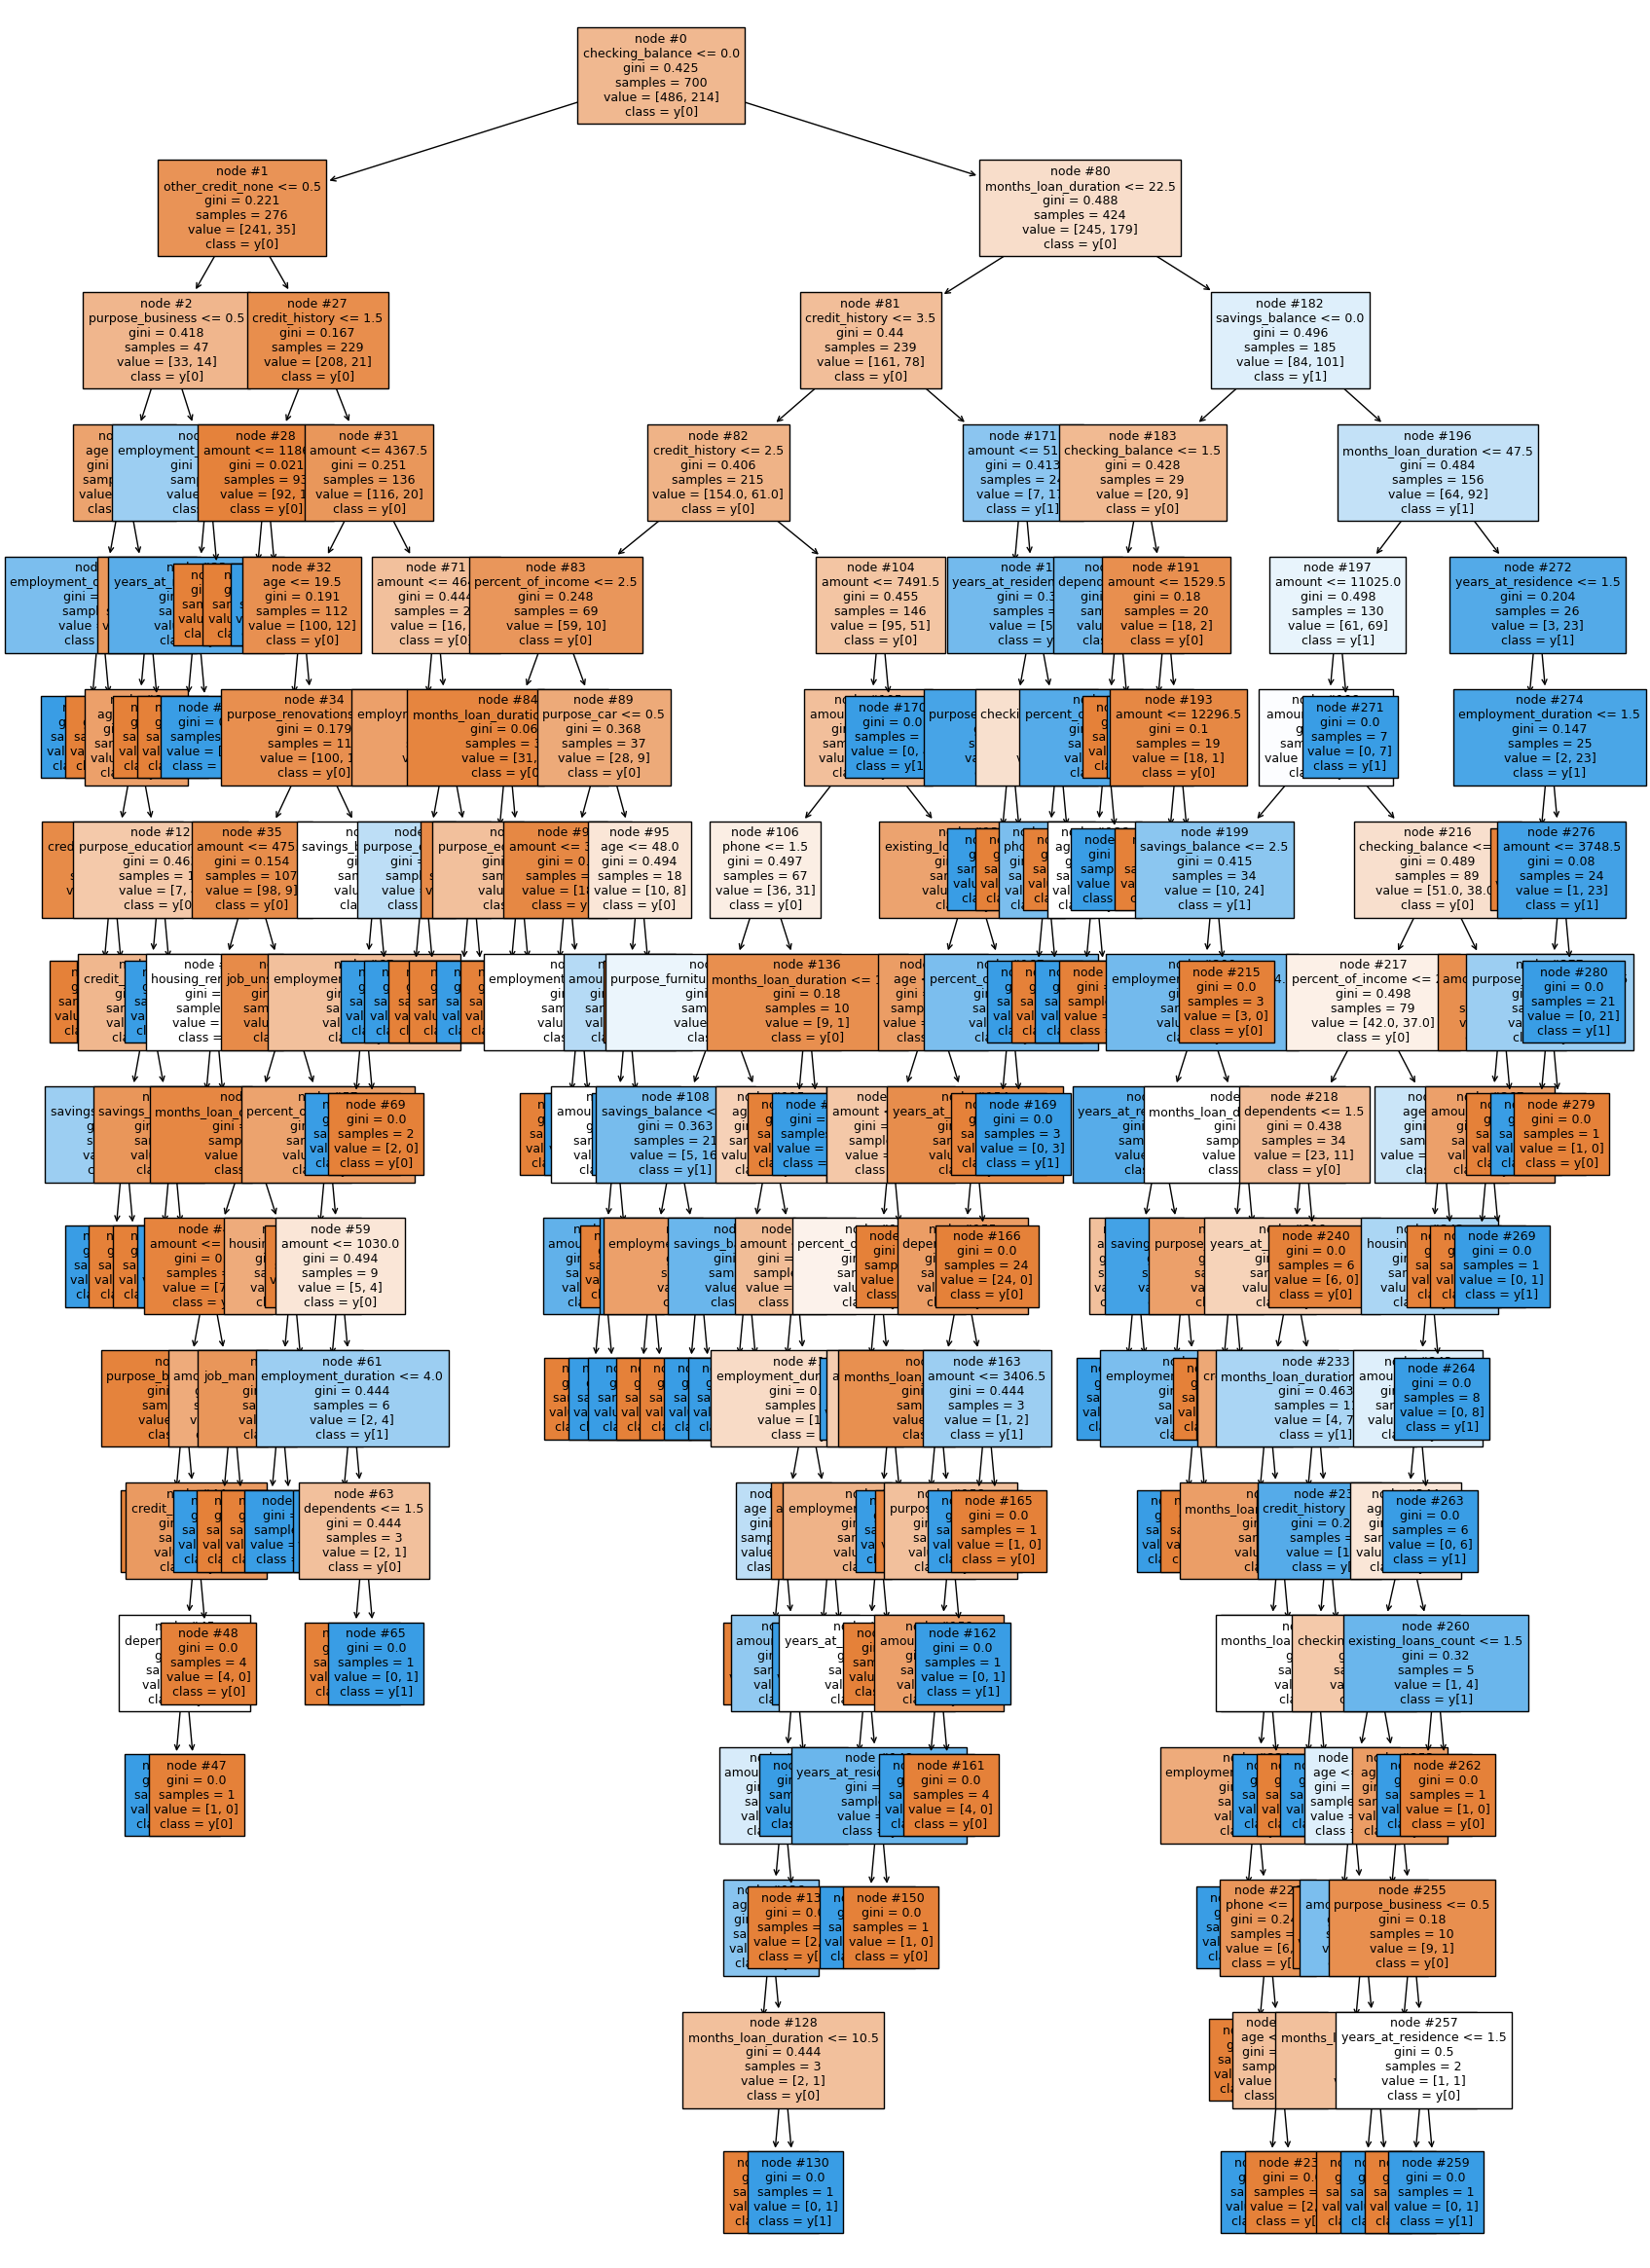

In [39]:
feature_names = list(X.columns)
print("feature_names are",feature_names)
plt.figure(figsize=(20,30))
tree.plot_tree(decision_tree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

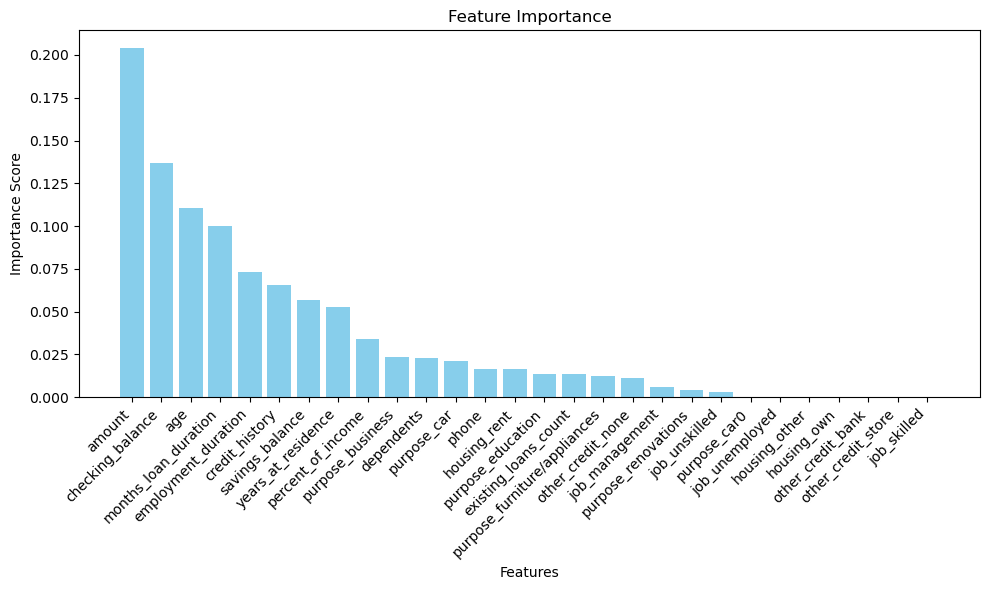

In [40]:
feature_importance = decision_tree.feature_importances_
feature_names = list(X.columns)

# Sort feature importance in descending order
indices = np.argsort(feature_importance)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[indices], align="center", color='skyblue')
plt.xticks(range(len(feature_importance)), np.array(feature_names)[indices], rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

### Let's reduce the tree complixity which will tend to overfits.

#### Model_2 of decision tree.

In [43]:
decision_tree_2 = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=1)
DT=decision_tree_2.fit(X_train, y_train)
DT

DecisionTreeClassifier(max_depth=3, random_state=1)

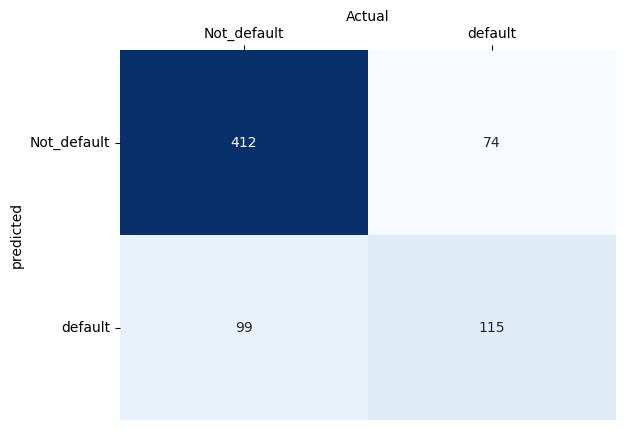

In [44]:
conf_mat(decision_tree_2,y_train,X_train)

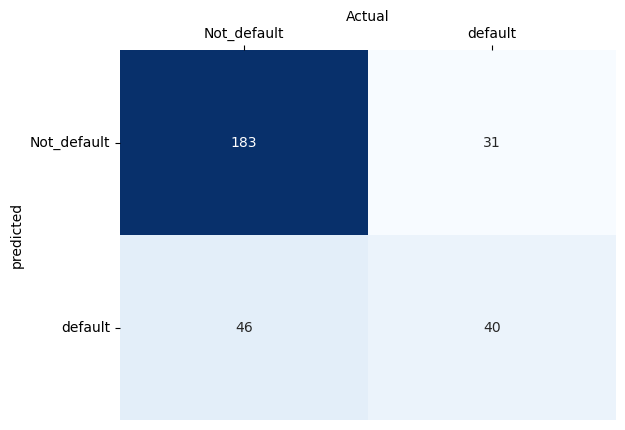

In [45]:
conf_mat(decision_tree_2,y_test,X_test)

In [46]:
print("accuracy for training data =",decision_tree_2.score(X_train,y_train))
print("accuracy for test data =",decision_tree_2.score(X_test,y_test))

accuracy for training data = 0.7528571428571429
accuracy for test data = 0.7433333333333333


In [47]:
# Predict on training data
y_train_pred = decision_tree_2.predict(X_train)

# Generate confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)

# Print confusion matrix
print("Confusion Matrix for Training Data:")
print(cm_train)

Confusion Matrix for Training Data:
[[412  74]
 [ 99 115]]


In [48]:
print("TN",cm_train[0][0])
print("FP",cm_train[0][1])
print("FN",cm_train[1][0])
print("TP",cm_train[1][1])

TN 412
FP 74
FN 99
TP 115


In [49]:
# To calculate recall for the tarining data:
print("Recall for the training data =",(cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])))

Recall for the training data = 0.5373831775700935


In [50]:
# Predict on training data
y_test_pred = decision_tree_2.predict(X_test)

# Generate confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix
print("Confusion Matrix for Training Data:")
print(cm_test)

Confusion Matrix for Training Data:
[[183  31]
 [ 46  40]]


In [51]:
print("TN",cm_test[0][0])
print("FP",cm_test[0][1])
print("FN",cm_test[1][0])
print("TP",cm_test[1][1])

TN 183
FP 31
FN 46
TP 40


In [52]:
print("Recall for the model_2 testing data =",(cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])))

Recall for the model_2 testing data = 0.46511627906976744


* There is no improvement in the model's recall score.

### Let's visualize the model_2 tree.

feature_names are ['checking_balance', 'months_loan_duration', 'credit_history', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'phone', 'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'housing_other', 'housing_own', 'housing_rent', 'other_credit_bank', 'other_credit_none', 'other_credit_store', 'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled']


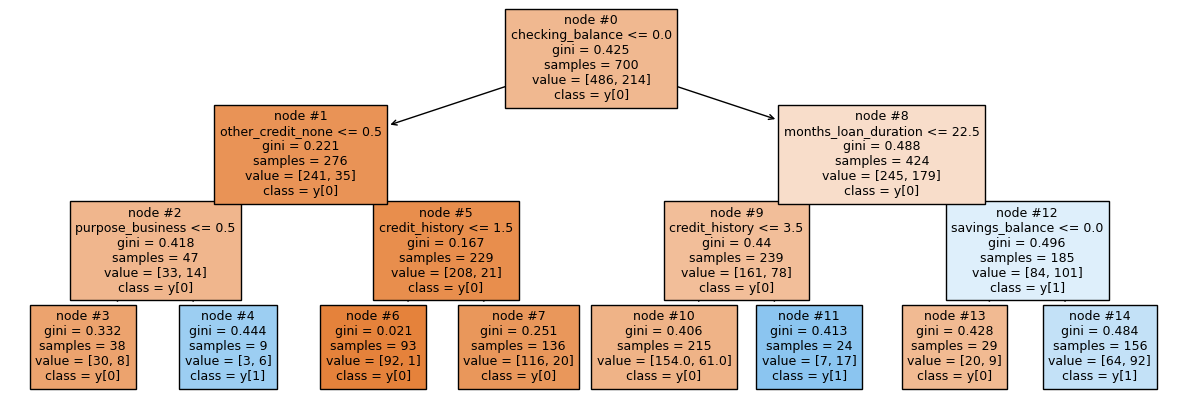

In [55]:
feature_names = list(X.columns)
print("feature_names are",feature_names)
plt.figure(figsize=(15,5))
tree.plot_tree(decision_tree_2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

## To make the model better i will  use the post pruning method (Cost Complexity Pruning).

In [57]:
# Train a decision tree
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)

# Get cost complexity pruning path
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [58]:
clfs = []
recall_scores = []

# Train a model for each alpha
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
    # Predict on test data and calculate recall
    y_test_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_test_pred)
    recall_scores.append(recall)

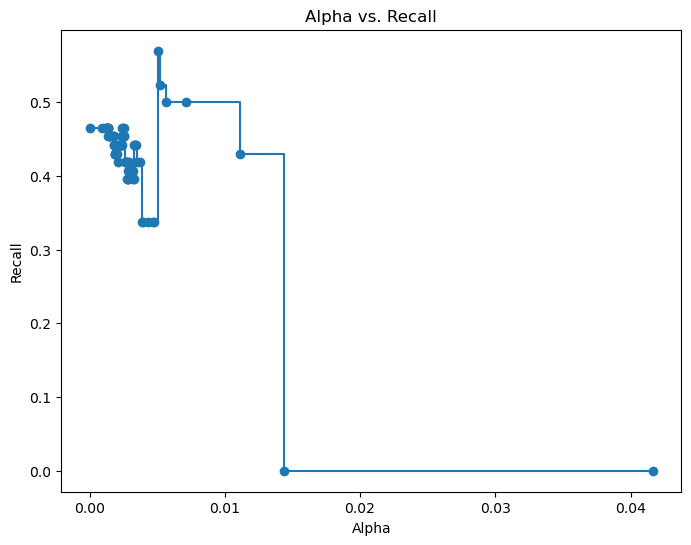

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, recall_scores, marker='o', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Recall")
plt.title("Alpha vs. Recall")
plt.show()

In [60]:
best_alpha_index = recall_scores.index(max(recall_scores))
best_ccp_alpha = ccp_alphas[best_alpha_index]
print(f"Best alpha: {best_ccp_alpha}")

Best alpha: 0.0050611694980498625


In [61]:
# Train the final model with the best alpha
final_model = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp_alpha)
final_model.fit(X_train, y_train)

# Predict on test data
y_test_pred_final = final_model.predict(X_test)

# Generate confusion matrix and calculate recall
cm_test_final = confusion_matrix(y_test, y_test_pred_final)
recall_final = recall_score(y_test, y_test_pred_final)

print("Confusion Matrix for Final Model:")
print(cm_test_final)
print(f"Recall for the final model: {recall_final:.4f}")

Confusion Matrix for Final Model:
[[175  39]
 [ 37  49]]
Recall for the final model: 0.5698


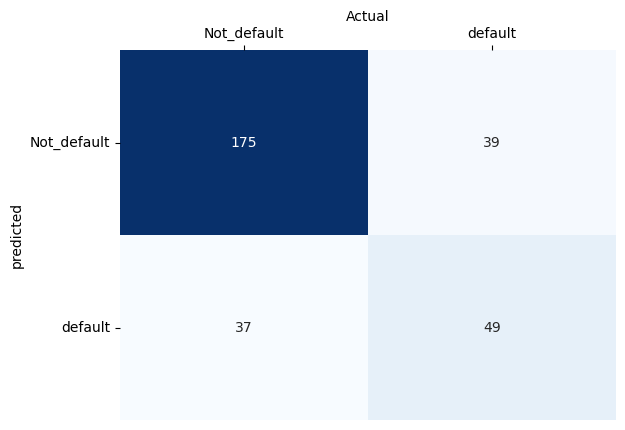

In [62]:
conf_mat(final_model,y_test,X_test)

feature_names are ['checking_balance', 'months_loan_duration', 'credit_history', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'phone', 'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'housing_other', 'housing_own', 'housing_rent', 'other_credit_bank', 'other_credit_none', 'other_credit_store', 'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled']


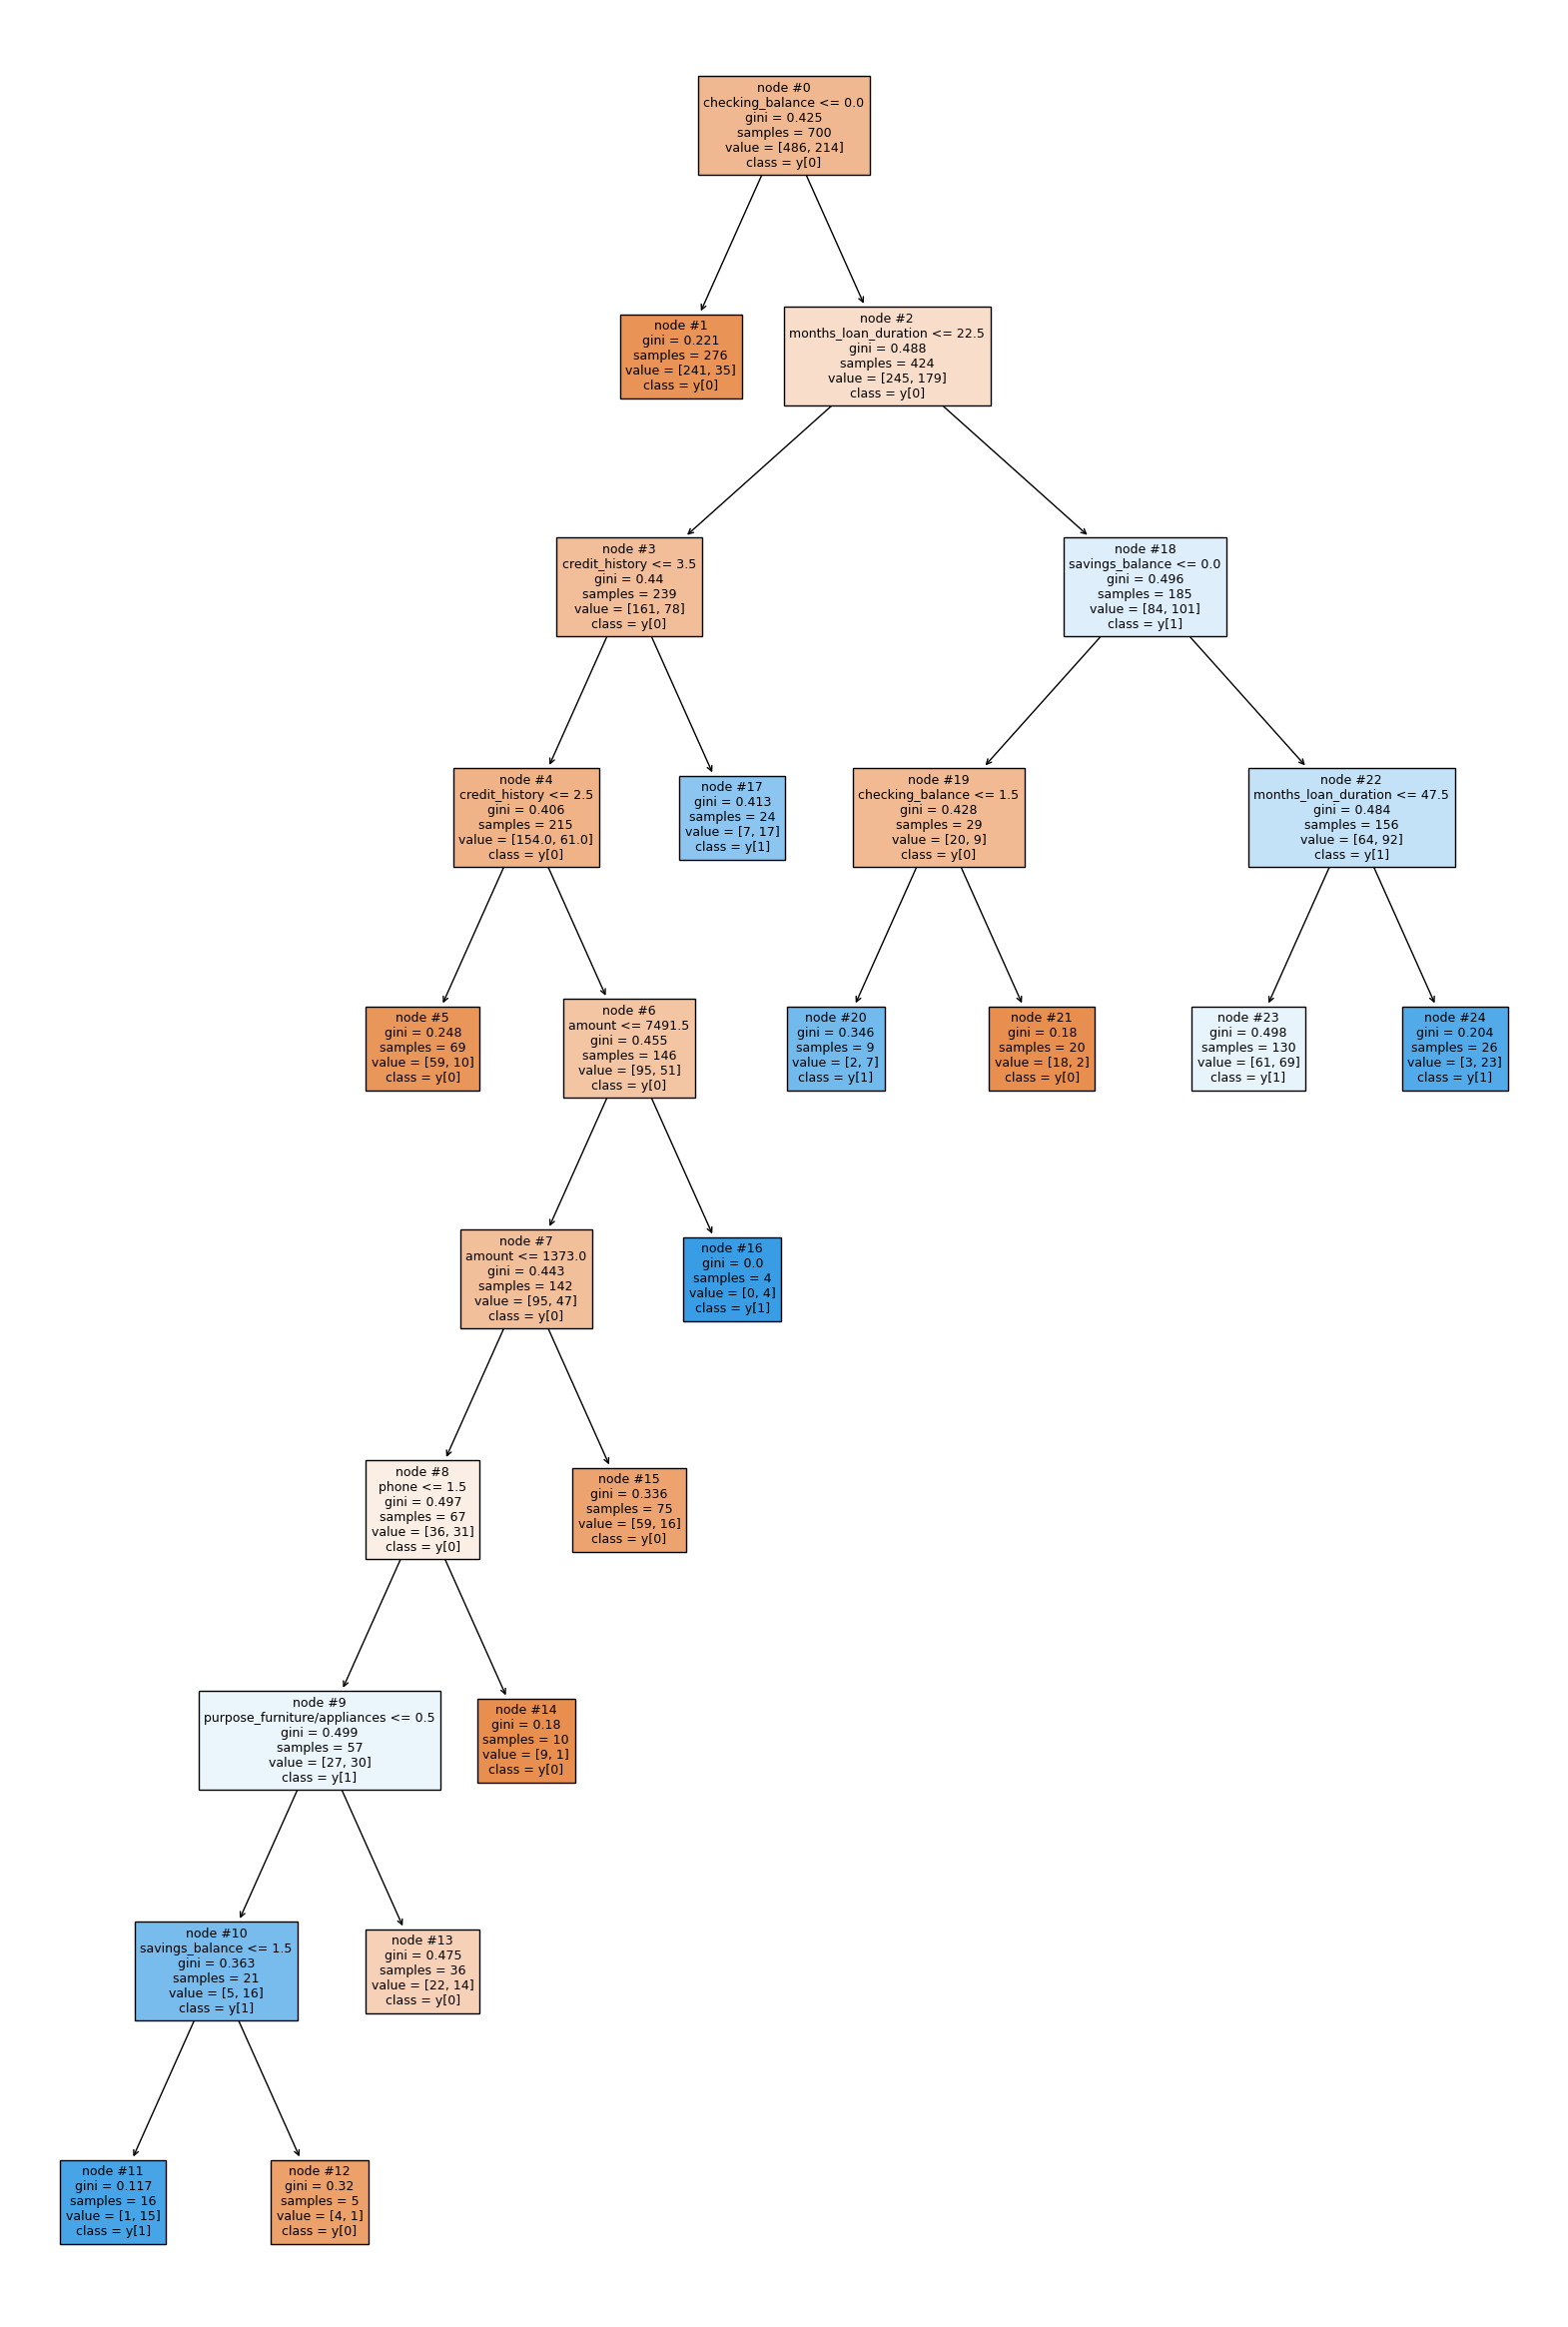

In [63]:
feature_names = list(X.columns)
print("feature_names are",feature_names)
plt.figure(figsize=(20,30))
tree.plot_tree(final_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

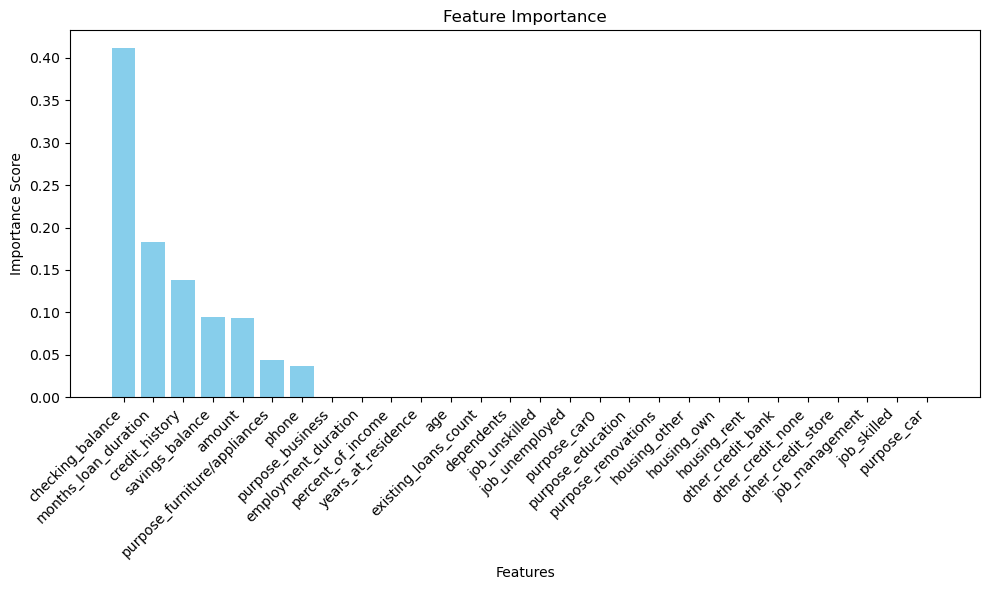

In [64]:
feature_importance = final_model.feature_importances_
feature_names = list(X.columns)

# Sort feature importance in descending order
indices = np.argsort(feature_importance)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[indices], align="center", color='skyblue')
plt.xticks(range(len(feature_importance)), np.array(feature_names)[indices], rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [65]:
model_names = ['Model_1', 'Model_2', 'Post_Pruned Model']
test_data_recall_scores = [.4651, .4651, 0.5698]  

model_comparison = pd.DataFrame({
    'Model': model_names,
    'test_data_recall_Score': test_data_recall_scores
})

model_comparison

,Model,test_data_recall_Score
0,Model_1,0.4651
1,Model_2,0.4651
2,Post_Pruned Model,0.5698
